<a href="https://colab.research.google.com/github/rujool11/ML-learning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classification using neural networks**

Binary Classification - Something is x or not x

Multiclass Classification - Classification among a lot of different classes



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
import numpy as np

n_samples = 1000 # creating the dataset
X, y = make_circles(n_samples,noise=0.03,random_state=42)
X[:10], y[:10]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


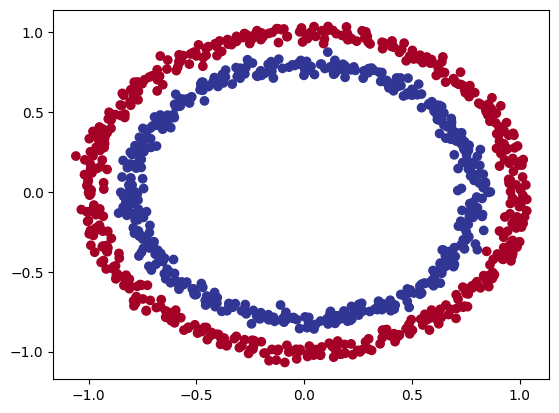

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### **model 1**

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']) # accuracy is proportion of examples we got right

model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 6.2681 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 6.0564 - accuracy: 0.4820
Epoch 3/200
32/32 [==============================] - 0s 987us/step - loss: 5.7920 - accuracy: 0.4880
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 4.8038 - accuracy: 0.5110
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 3.3910 - accuracy: 0.4940
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 1

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
# about 50%, basically just guessing

### **model 2**

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=200, verbose=0)

In [ ]:
model_2.evaluate(X,y)
# still just guessing, actually even worse

32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4200


[0.6968304514884949, 0.41999998688697815]

In [ ]:
# visualizing our model, look up this function in detail later
def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  #create x_value to make predictions

  x_in = np.c_[xx.ravel(), yy.ravel()] # stacking 2D arrays together

  y_pred = model.predict(x_in)

  if len(y_pred[0])>1:
    print('doing multiclass classification')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape) # reshaping to get ready for plotting
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()


313/313 [==============================] - 0s 1ms/step
doing binary classification


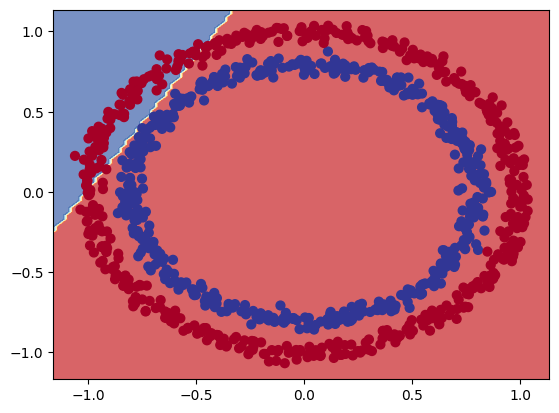

In [ ]:
plot_decision_boundary(model=model_2, X=X, y=y)

In [ ]:
# looks like a regression problem , straight line, so will not work for a classification problem (circular data)

### **non linearity**

**model 3**


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6190
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5470
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7720
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.9280
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.8250
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.9210
Epoch 11/

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005145047791302204, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classification


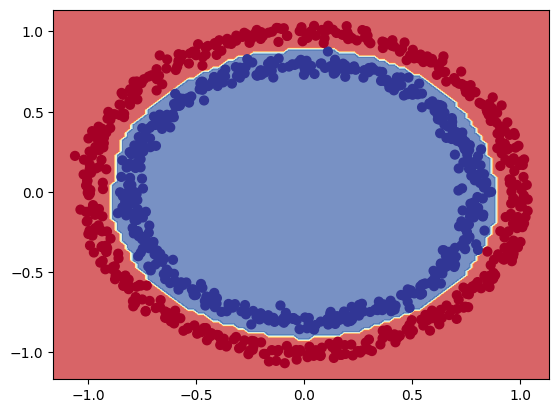

In [ ]:
plot_decision_boundary(model=model_3, X=X, y=y)

<Axes: >

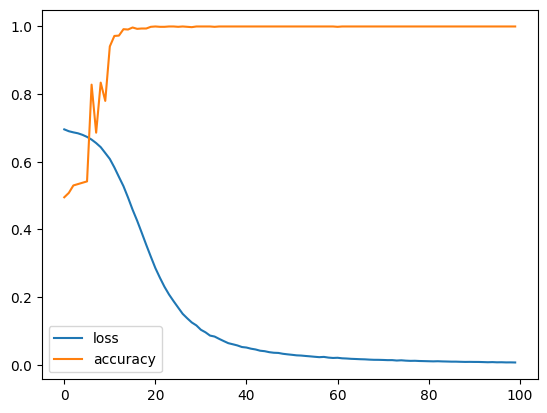

In [ ]:
pd.DataFrame(history.history).plot()

### **Using callbacks to find ideal learning rate**

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# lr values start from 1e-4, and increase by a rate of 10^(epoch/20) with each epoch

history = model_4.fit(X,y,epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7012 - accuracy: 0.4930 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4960 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4990 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4970 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4880 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4880 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4800 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4780 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss:

<Axes: >

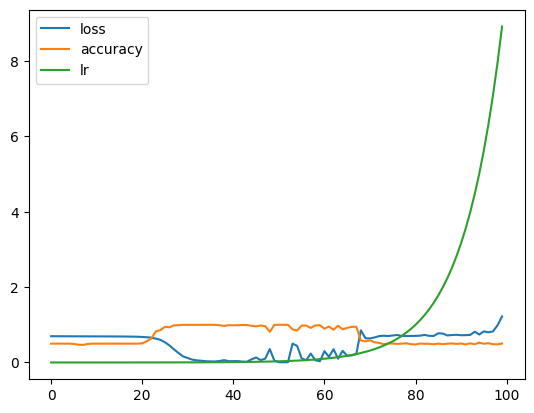

In [ ]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'learning rate vs loss')

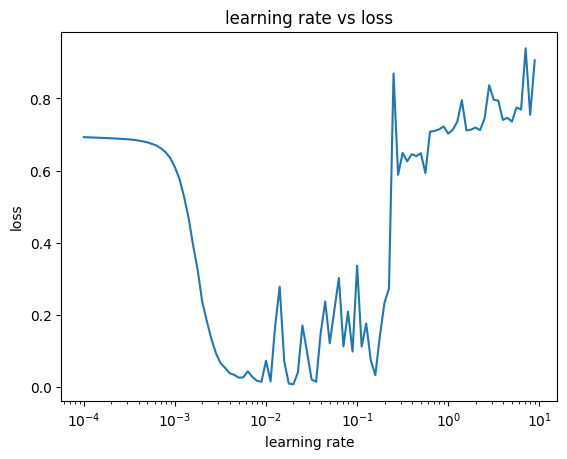

In [ ]:
# learning rate keeps increasing with each epoch
# accuracy and loss are changing for the good, but after a point they change for the bad
# to get more information, we plot the learning rate vs the loss

lrs = 1e-4 * 10**(tf.range(100)/20)
plt.semilogx(lrs, history.history['loss']) # semilogx gives plot with log scaling on the x axis
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [ ]:
# as we can see, loss is decreasing fastest around point 10^-3 to 10^-2. Adam optimizer's default value should usually be decent
# accuracy metric is not good for imbalanced cases (eg. when you have 1000 yes cases and 10 no cases)
# we can use precision, which leads to less false positives



### **Confusion matrix**

correct predictions on the diagonals


In [ ]:
from sklearn.metrics import confusion_matrix
X_test, y_test = make_circles(200,noise=0.3)
y_preds = model_3.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds)) # round to 0/1


NameError: ignored

In [ ]:
model_3.evaluate(X_test,y_test)

In [ ]:
# making confusion matrix prettier (look up later), confusion matrix topic in general

### **Larger Example** (multiclass classification)

neural network model to identify different items of clothing


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

#data is already sorted into traning and test sets

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'training example: \n{train_data[0]}\n')
print(f'training label: \n{train_labels[0]}\n')

training example: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
# data information github.com/zalandoresearch/fashion-mnist

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

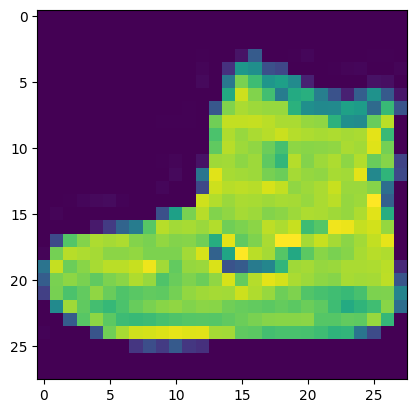

In [ ]:
# plot some images
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

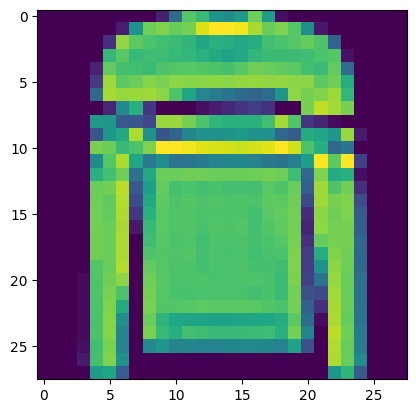

In [ ]:
plt.imshow(train_data[5])

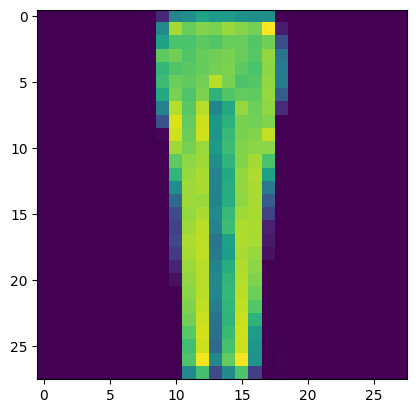

In [ ]:
plt.imshow(train_data[2344])

In [ ]:
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'pullover')

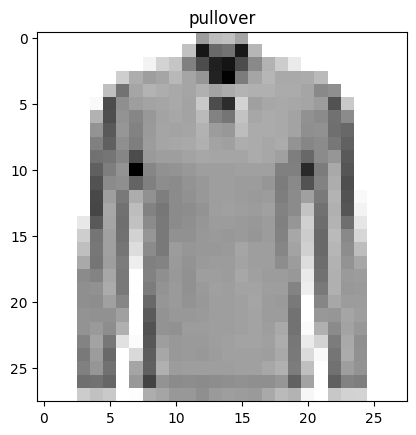

In [ ]:
plt.imshow(train_data[501],cmap=plt.cm.binary)
plt.title(class_names[train_labels[501]])

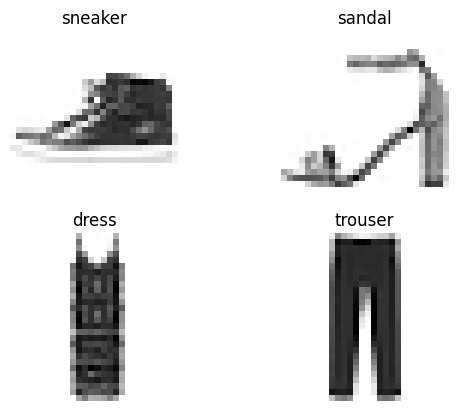

In [ ]:
import random
for i in range(4):
  axis = plt.subplot(2,2,i+1)
  randind = random.choice(range(len(train_data)))
  plt.imshow(train_data[randind],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[randind]])
  plt.axis(False)

In [ ]:
train_data[0].shape, train_labels[0].shape, test_data[0].shape, test_labels[0].shape

((28, 28), (), (28, 28), ())

In [18]:
tf.random.set_seed(42)

fashion_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #flattens the input to make it compatible
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# for CategoricalCrossentropy, we need inputs in one hot encoded format, for integers, use can SparseCategoricalCrossentropy
fashion_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history_1 = fashion_1.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,
                          validation_data=(test_data,tf.one_hot(test_labels,depth=10)))



Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.5736 - accuracy: 0.1191 - val_loss: 2.1368 - val_accuracy: 0.1534
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8099 - accuracy: 0.2570 - val_loss: 1.6683 - val_accuracy: 0.3113
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6156 - accuracy: 0.3302 - val_loss: 1.5666 - val_accuracy: 0.3507
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5400 - accuracy: 0.3550 - val_loss: 1.5243 - val_accuracy: 0.3580
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4548 - accuracy: 0.3963 - val_loss: 1.3335 - val_accuracy: 0.4355
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3195 - accuracy: 0.4423 - val_loss: 1.3126 - val_accuracy: 0.4486
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2976 - accuracy: 0.4468 - val_loss: 1.3147 - val_accuracy

In [19]:
# validation data is data model has never seen before, val_accuracy is accuracy for that

In [24]:
# use normalized data, neural networks perform better on that
# normalize by diving by largest number
train_data.min(), train_data.max()

(0, 255)

In [25]:
train_data_norm = train_data/ 255.0
test_data_norm = test_data/ 255.0
train_data.min(), train_data.max()

(0, 255)

In [29]:
tf.random.set_seed(42)

fashion_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history_2 = fashion_2.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7454 - accuracy: 0.7455 - val_loss: 0.5530 - val_accuracy: 0.8060
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4960 - accuracy: 0.8277 - val_loss: 0.5204 - val_accuracy: 0.8245
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4546 - accuracy: 0.8411 - val_loss: 0.4852 - val_accuracy: 0.8250
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4301 - accuracy: 0.8483 - val_loss: 0.4565 - val_accuracy: 0.8399
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4171 - accuracy: 0.8526 - val_loss: 0.4716 - val_accuracy: 0.8348
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4048 - accuracy: 0.8557 - val_loss: 0.4429 - val_accuracy: 0.8425
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3964 - accuracy: 0.8585 - val_loss: 0.4443 - val_accuracy:

<Axes: >

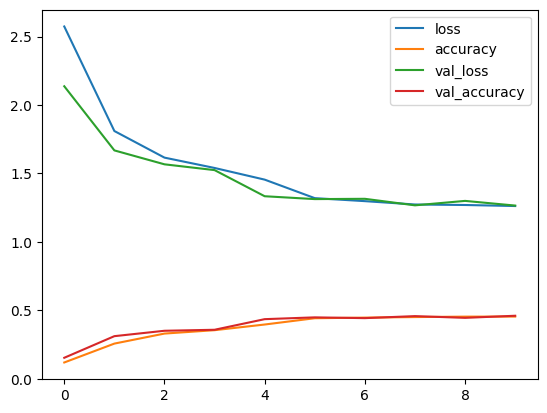

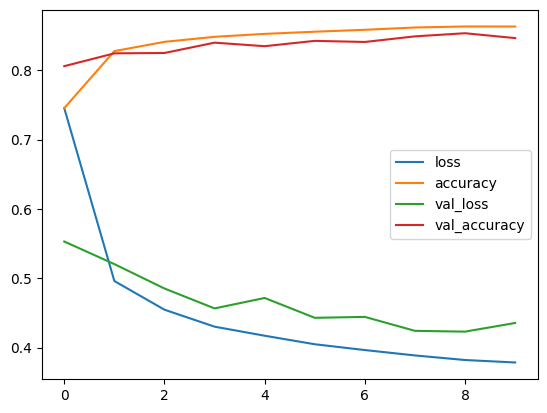

In [30]:
# as we see, normalizing our data is much better
# thus, neural networks work much better when data is normalized
pd.DataFrame(history_1.history).plot()
pd.DataFrame(history_2.history).plot()

In [34]:
# finding ideal learning rate
tf.random.set_seed(42)

fashion_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

fashion_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history_3 = fashion_3.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7013 - accuracy: 0.7576 - val_loss: 0.5112 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4611 - accuracy: 0.8381 - val_loss: 0.5156 - val_accuracy: 0.8231 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4285 - accuracy: 0.8480 - val_loss: 0.4718 - val_accuracy: 0.8303 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4086 - accuracy: 0.8540 - val_loss: 0.4531 - val_accuracy: 0.8402 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3992 - accuracy: 0.8570 - val_loss: 0.4611 - val_accuracy: 0.8364 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3896 - accuracy: 0.8605 - val_loss: 0.4622 - val_accuracy: 0.8342 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 6s

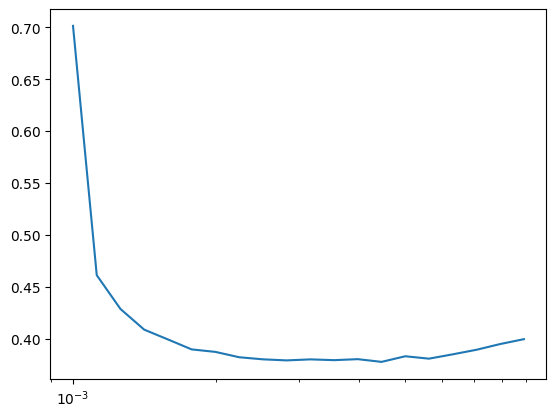

In [35]:
lrs = 1e-3 * 10**(tf.range(20)/20)
plt.semilogx(lrs, history_3.history['loss'])

In [38]:
# as we see, 10^-3 (default) is a pretty decent learning rate
tf.random.set_seed(42)

fashion_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fashion_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history_4 = fashion_4.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5034 - accuracy: 0.8208 - val_loss: 0.4202 - val_accuracy: 0.8483
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3696 - accuracy: 0.8652 - val_loss: 0.4462 - val_accuracy: 0.8484
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3347 - accuracy: 0.8765 - val_loss: 0.3886 - val_accuracy: 0.8596
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3132 - accuracy: 0.8852 - val_loss: 0.3815 - val_accuracy: 0.8597
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2971 - accuracy: 0.8880 - val_loss: 0.3688 - val_accuracy: 0.8625
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2820 - accuracy: 0.8945 - val_loss: 0.3754 - val_accuracy: 0.8608
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.8982 - val_loss: 0.3713 - val_accuracy:

<Axes: >

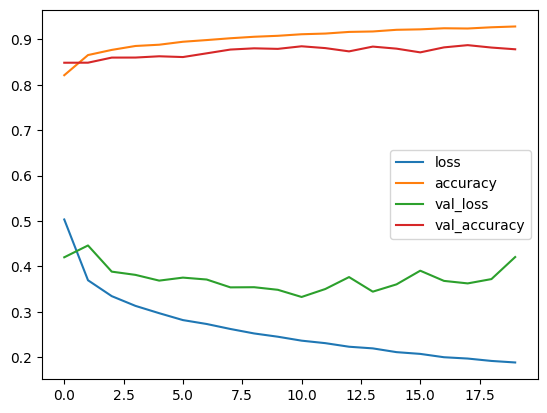

In [39]:
pd.DataFrame(history_4.history).plot()

In [42]:
fashion_4.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4207 - accuracy: 0.8779


[0.42072099447250366, 0.8779000043869019]

Confusion matrix (look up later)

1/1 [==============================] - 0s 19ms/step
likeliness: 0.984932005405426


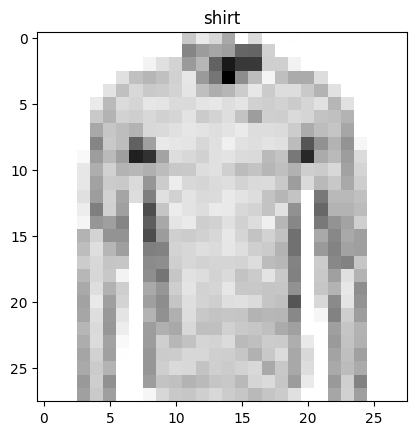

In [84]:
ind = random.randint(0,len(test_data))
y_pred = fashion_4.predict(test_data_norm[ind].reshape(1,28,28)) # 1,28,28 since only passing one image at a time
# make predictinos on the same kind of data your model was trained on
plt.imshow(test_data[ind], cmap=plt.cm.binary)
pred = y_pred.argmax() # gives index of largest
pred_val = np.squeeze(y_pred,axis=0)[pred]
plt.title(class_names[pred])
print(f'likeliness: {pred_val}')